This notebook tests the creation of the example map from the original paper of the spatial reasoning architecture. At the moment the map that one would expect is not created but the resulting map only consists of two objects and not 5 objects. The map looks like the result of the first supplied sentence. It could be the case that the following sentences have to be supplied later than at the moment so that the system can reset its parameters before placing new objects in the scene. Also, in the experiment files from the seminar the target, reference and spatial relation of a sentence are supplied after each other and not in the same time. 

In [1]:
import sys
sys.path.append('../')
from read_json import load_from_json
from parse_cedar_objects import parse_cedar_params, make_connection
import nengo
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PROBE_ALL = False
SAVE_SIMULATION = False

In [3]:
objects, connections = load_from_json('../JSON/mental_imagery_extended.json')

Component Multiply 20 does not have 2 inputs, but 0!
The object Static Gain 23 does not have a source!


In [4]:
tau_factor = 0.2
model = nengo.Network()

with model:
    nengo_objects = {}
    # create the nodes
    for ob_key in objects:
        name, instance = parse_cedar_params(objects[ob_key])
        if instance.__class__.__name__ == 'NeuralField':
            instance.tau *= tau_factor
        instance.make_node()
        nengo_objects[name] = instance
    # create the connections
    for connection in connections:
        make_connection(connection[0][1], connection[1][1], nengo_objects)

In [5]:
len(model.nodes)

433

In [6]:
# the list contains all nodes that are plotted in the plotting widget of the cedar architecture
objects_to_probe = ['Reference Behavior.intention node',      # Reference processes
                    'Reference Behavior.CoS node', 
                    'Reference Field & Reference Production Nodes.intention node',
                    'Reference Field & Reference Production Nodes.CoS node',
                    'Reference Memory Nodes & Color Field.intention node',
                    'Reference Memory Nodes & Color Field.CoS node', 
                    'Target Behavior.intention node',        # Target processes
                    'Target Behavior.CoS node', 
                    'Target Field & Target Production Nodes.intention node',
                    'Target Field & Target Production Nodes.CoS node',
                    'Reference Memory Nodes & Color Field 2.intention node',
                    'Reference Memory Nodes & Color Field 2.CoS node',
                    'Match Field.intention node', 
                    'Match Field.CoS node',
                    'Relational Behavior.intention node',   # Spatial processes
                    'Relational Behavior.CoS node',
                    'OC Field and Spatial Production Nodes  .intention node',
                    'OC Field and Spatial Production Nodes  .CoS node',
                    'Condition of  Dissatisfaction .intention node', 
                    'Condition of  Dissatisfaction .CoS node',
                    'Spatial Memory Nodes.intention node', 
                    'Spatial Memory nodes.CoS node',
                    'Colour',                              # Color attention                                
                    'Projection',                          # Attention (space)
                    'Indeterminent ',                      # Spatial scene representation
                    'Reference',                           # Reference
                    'Target',                              # Target
                    'Object-centered ',                    # Relational
                    'Reference Red Memory',                # Reference color memory
                    'Reference Blue Memory', 
                    'Reference Cyan Memory', 
                    'Reference Green Memory', 
                    'Reference Orange Memory', 
                    'To the left of Memory',               # Spatial relation memory
                    'To the Right of Memory', 
                    'Above Memory', 
                    'Below Memory', 
                    'Target Red Memory',                   # Target color memory
                    'Target Blue Memory', 
                    'Target Cyan Memory', 
                    'Target Green Memory', 
                    'Target Orange Memory ', 
                    'Reference Red Production',            # Reference color production
                    'Reference Blue Production', 
                    'Reference Cyan Production', 
                    'Reference Green Production', 
                    'Reference Orange Production',
                    'To the left of Production',           # Spatial relation production
                    'To the Right of Production', 
                    'Above Production', 
                    'Below Production',
                    'Target Red Production',               # Target color production
                    'Target Blue Production', 
                    'Target Cyan Production', 
                    'Target Green Production', 
                    'Target Orange Production']

In [7]:
with model:
    probes = {}
    for key in nengo_objects:
        if not PROBE_ALL:
            if key in objects_to_probe:
                probes[key] = nengo.Probe(nengo_objects[key].node, sample_every=0.01)
        else:
            probes[key] = nengo.Probe(nengo_objects[key].node, sample_every=0.05)

# # set to correct value
# nengo_objects['Reference: Blue'].strength = 5.1
nengo_objects['Reference: Blue'].strength

5.1

In [8]:
sim = nengo.Simulator(model)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [9]:
# Supply first sentence: There is a cyan object above a green object
nengo_objects['Reference: Green'].active = True
nengo_objects['Target: Cyan'].active = True
nengo_objects['Spatial relation: Above'].active = True

sim.run_steps(int(500*tau_factor))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [10]:
# Activate imagine node
nengo_objects['Reference: Green'].active = False
nengo_objects['Target: Cyan'].active = False
nengo_objects['Spatial relation: Above'].active = False
nengo_objects['Action: Imagine'].active = True

sim.run_steps(int(8500*tau_factor))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [11]:
# Supply second sentence: There is a red object to the left of the green object
nengo_objects['Reference: Green'].active = True
nengo_objects['Target: Red'].active = True
nengo_objects['Spatial relation: Left'].active = True

sim.run_steps(int(500*tau_factor))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [12]:
nengo_objects['Reference: Green'].active = False
nengo_objects['Target: Red'].active = False
nengo_objects['Spatial relation: Left'].active = False

sim.run_steps(int(8500*tau_factor))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [13]:
# Supply third sentence: There is a blue object to the right of the red object
nengo_objects['Reference: Red'].active = True
nengo_objects['Target: Blue'].active = True
nengo_objects['Spatial relation: Right'].active = True

sim.run_steps(int(500*tau_factor))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [14]:
nengo_objects['Reference: Red'].active = False
nengo_objects['Target: Blue'].active = False
nengo_objects['Spatial relation: Right'].active = False

sim.run_steps(int(8500*tau_factor))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [15]:
# supply fourth sentence: There is an orange object to the left of the blue object
nengo_objects['Reference: Blue'].active = True
nengo_objects['Target: Orange'].active = True
nengo_objects['Spatial relation: Left'].active = True

sim.run_steps(int(500*tau_factor))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [16]:
nengo_objects['Reference: Blue'].active = False
nengo_objects['Target: Orange'].active = False
nengo_objects['Spatial relation: Left'].active = False

sim.run_steps(int(8500*tau_factor))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [17]:
sim.close()

In [18]:
# save simulation results
from datetime import datetime
import os 
timestamp = str(datetime.now()).rsplit('.',1)[0]
print(timestamp)

if SAVE_SIMULATION:
    os.mkdir('../simulation_data/%s' %timestamp)
    for ob_key in probes:
        file_name = ob_key.replace('/','_')
        np.save('../simulation_data/%s/%s_%s' %(timestamp, file_name, timestamp), sim.data[probes[ob_key]])

2019-10-23 21:26:57


# Plot color activation

In [19]:
def plot_2dneuralfield(nf_data, time_points, colorbar=False, title=None, save=False):
    plt.figure(figsize=(11.5, 9))
    # make title
    if title is None:
        plt.suptitle('Tau_factor %.2f' %tau_factor)
    else: 
        plt.suptitle('%s - Tau_factor %.2f' %(title, tau_factor))
    # plot 15 points in time 
    for i, time_point in enumerate(time_points):
        plt.subplot(6,6,i+1)
        plt.imshow(nf_data[time_point].reshape(50,50), cmap='jet')
        plt.title('%i ms' %(time_point*10))
        plt.xticks([])
        plt.yticks([])
        if colorbar:
            plt.colorbar()
            
    plt.subplots_adjust(top=0.93,wspace=0.26, hspace=0.23)
    # save image    
    if save:
        if not os.path.isdir('../../images/%.2f' %tau_factor):
            os.mkdir('../../images/%.2f' %tau_factor)
        plt.savefig('../../images/%.2f/%s_%.2f_%s.png' %(tau_factor,
                                                         title,
                                                         tau_factor,
                                                         timestamp))
    plt.show()
    
def plot_1dneuralfield(nf_data, time_points, title=None, save=False):
    plt.figure(figsize=(13,10))
    min = np.min(nf_data)
    max = np.max(nf_data)
    dif = max-min
    # make title
    if title is None:
        plt.suptitle('Tau_factor %.2f' %tau_factor)
    else: 
        plt.suptitle('%s - Tau_factor %.2f' %(title, tau_factor))
    
    for i, tp in enumerate(time_points):
        plt.subplot(6,6,i+1)
        plt.title('%i ms' %(tp*10))
        plt.plot(nf_data[tp])
        plt.ylim(min-0.1*dif, max+0.1*dif)
        
#     plt.tight_layout(rect=(0,0,1,0.96))
    plt.subplots_adjust(top=0.93, hspace=0.5, wspace=0.3)
    # save image
    if save:
        if not os.path.isdir('../../images/%.2f' %tau_factor):
            os.mkdir('../../images/%.2f' %tau_factor)
        plt.savefig('../../images/%.2f/%s_%.2f_%s.png' %(tau_factor,
                                                         title,
                                                         tau_factor,
                                                         timestamp))
    plt.show()

In [20]:
# for tau_factor 0.05 show every third step, for other tau_factors show a multiple 
# thereof
num_samples = sim.data[probes['Reference Blue Memory']].shape[0]
print('Number of samples:', num_samples)

if num_samples > 150:
    stepsize = 5*int(tau_factor/0.05)
    time_points = np.arange(0,num_samples, stepsize)[-36:]
    print('Difference between accurate points and the ones used:', 
          12*tau_factor/0.05 - stepsize)
else:
    time_points = np.arange(0, num_samples, 2)[-36:]
print('time_points: \n', time_points, len(time_points))

from cedar_modules import AbsSigmoid
sigmoid = AbsSigmoid()

Number of samples: 720
Difference between accurate points and the ones used: 28.000000000000007
time_points: 
 [  0  20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340
 360 380 400 420 440 460 480 500 520 540 560 580 600 620 640 660 680 700] 36


In [21]:
# nengo_objects['To the Right of Memory']

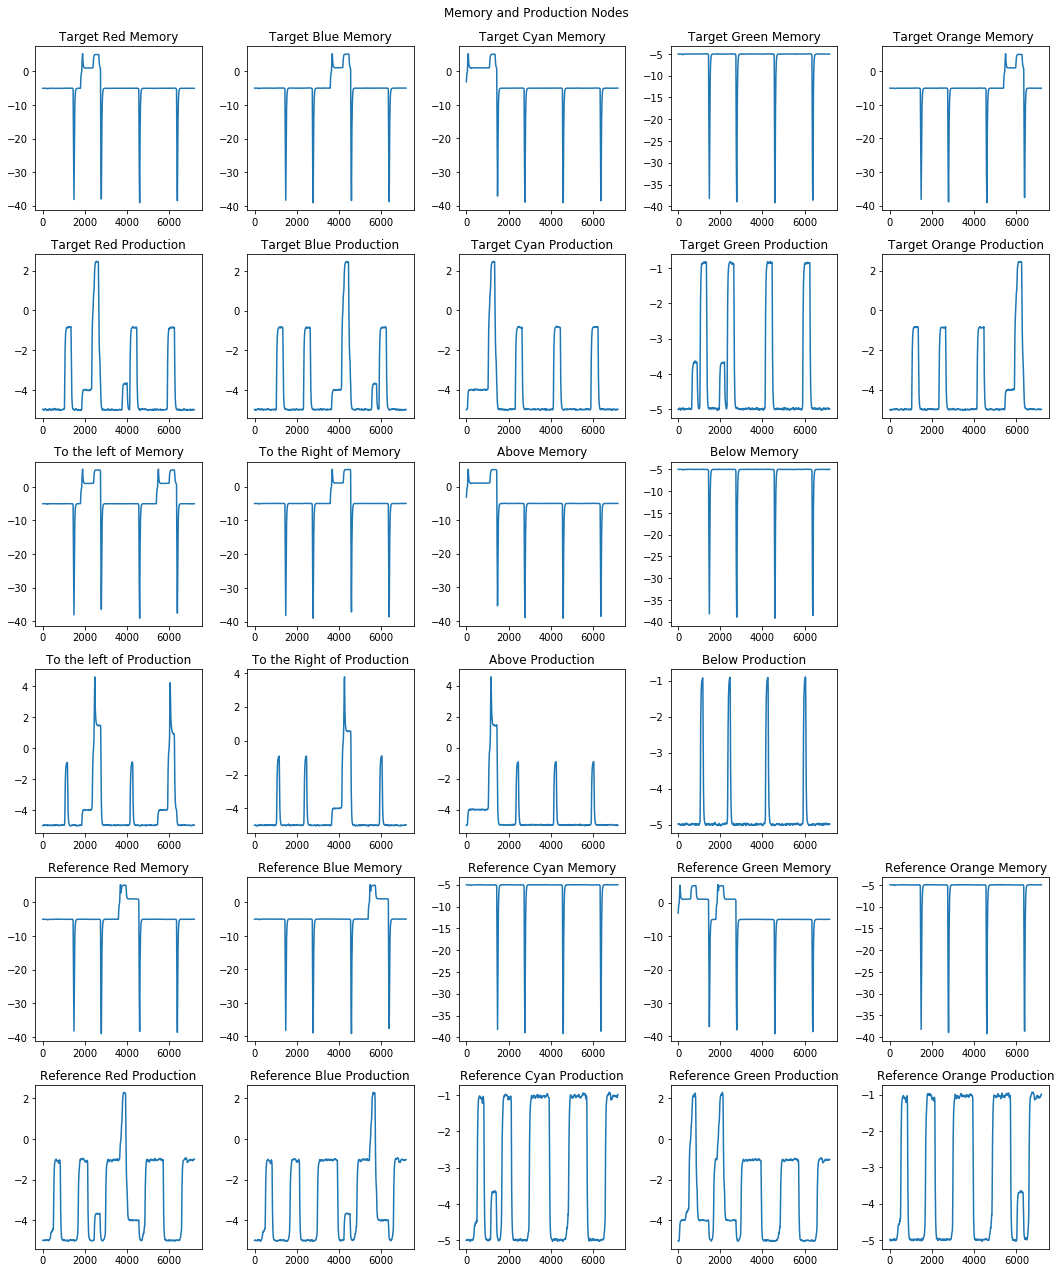

In [22]:
x = np.arange(0, num_samples) * 10

plot_1d = ['Target Red Memory', 'Target Blue Memory', 'Target Cyan Memory', 
           'Target Green Memory', 'Target Orange Memory ', 'Target Red Production', 
           'Target Blue Production', 'Target Cyan Production', 'Target Green Production', 
           'Target Orange Production', 'To the left of Memory', 'To the Right of Memory',
           'Above Memory', 'Below Memory', 'Empty','To the left of Production', 
           'To the Right of Production', 'Above Production', 'Below Production', 'Empty',
           'Reference Red Memory', 'Reference Blue Memory', 'Reference Cyan Memory', 
           'Reference Green Memory', 'Reference Orange Memory',
           'Reference Red Production', 'Reference Blue Production', 
           'Reference Cyan Production', 'Reference Green Production', 
           'Reference Orange Production']

plt.figure(figsize=(15,18))
plt.suptitle('Memory and Production Nodes')
for i, name in enumerate(plot_1d):
    if name == 'Empty':
        continue
    plt.subplot(6,5,i+1)
    plt.plot(x, sim.data[probes[name]])
    plt.title(name)
    
plt.tight_layout(rect=(0,0,1,0.97))

# save
if not os.path.isdir('../../images/%.2f' %tau_factor):
    os.mkdir('../../images/%.2f' %tau_factor)
plt.savefig('../../images/%.2f/Memory and Production Nodes_%.2f_%s.png' %(tau_factor,
                                                                          tau_factor,
                                                                          timestamp))
plt.show()

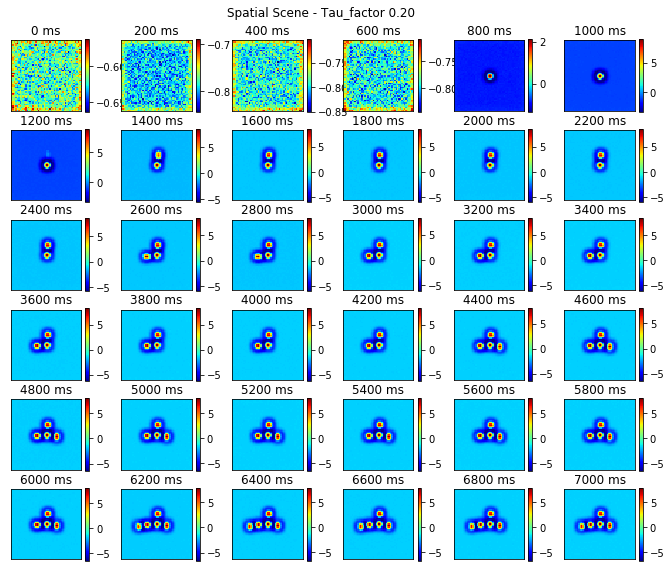

In [23]:
plot_2dneuralfield(sim.data[probes['Indeterminent ']], time_points, True, 'Spatial Scene', True)

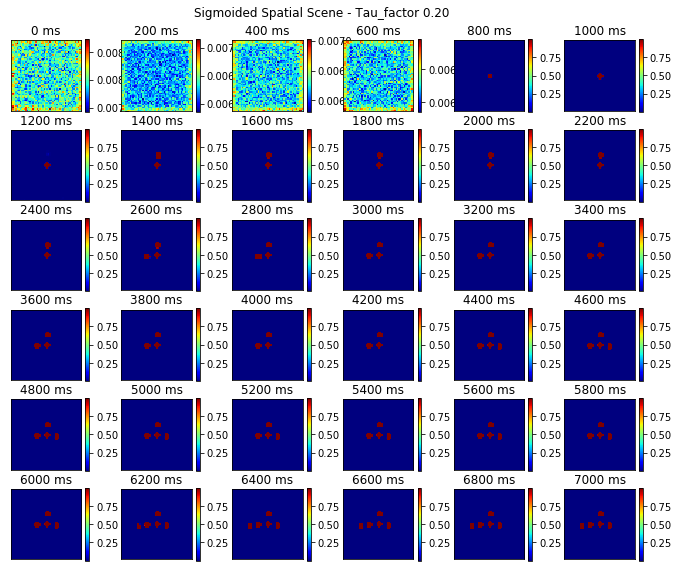

In [24]:
plot_2dneuralfield(sigmoid(sim.data[probes['Indeterminent ']]), time_points, True, 'Sigmoided Spatial Scene', True)

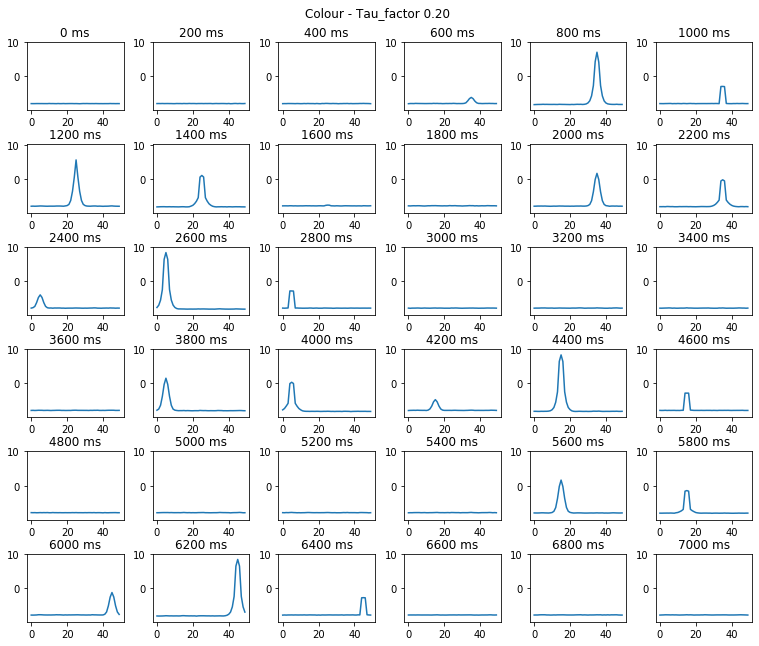

In [25]:
colour_data = sim.data[probes['Colour']]
plot_1dneuralfield(colour_data, time_points, 'Colour', True)

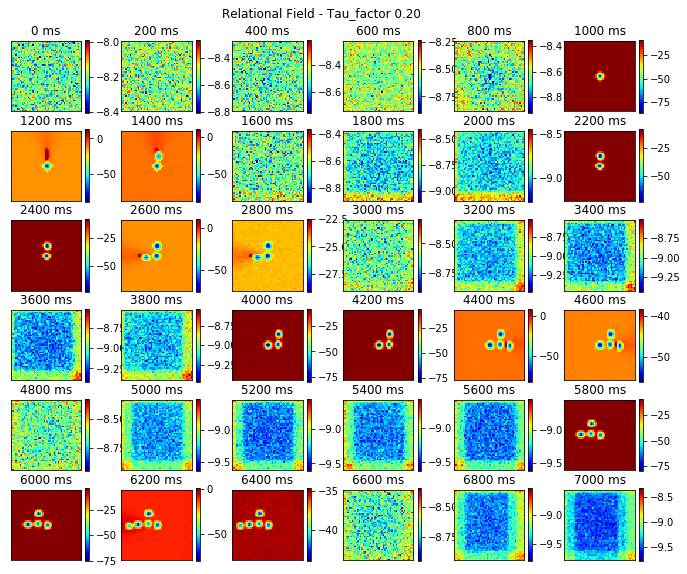

In [26]:
object_centered_data = sim.data[probes['Object-centered ']]
plot_2dneuralfield(object_centered_data, time_points, True, 'Relational Field', True)

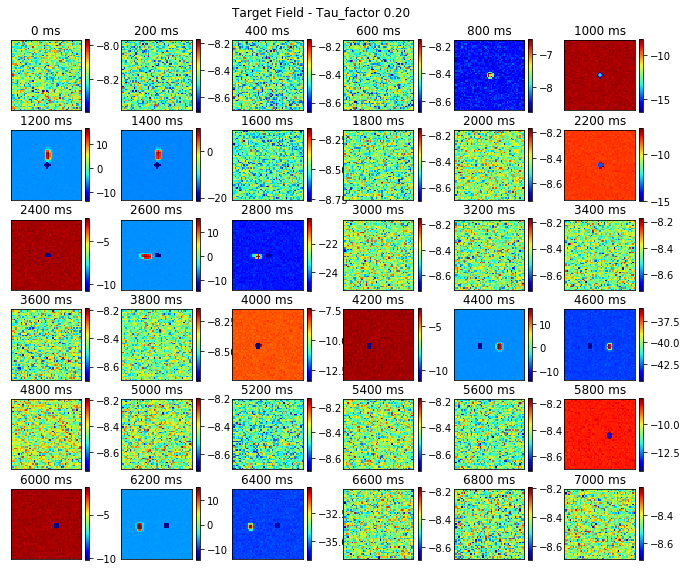

In [27]:
target = sim.data[probes['Target']]
plot_2dneuralfield(target, time_points, True, 'Target Field', True)

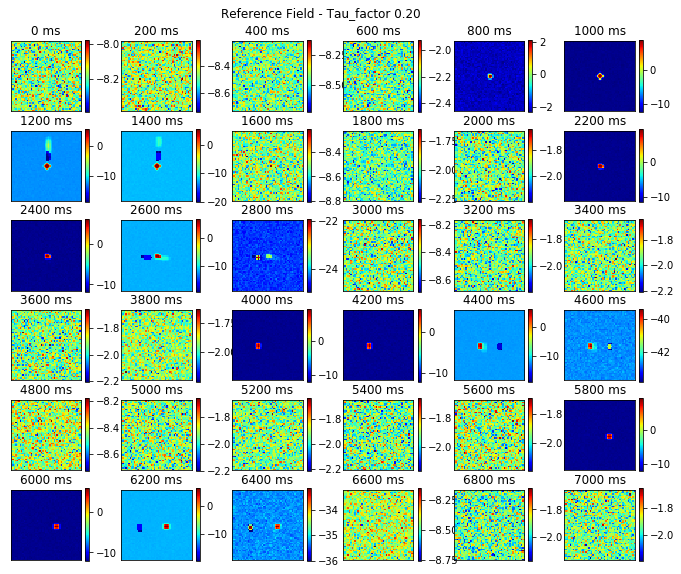

In [28]:
reference_data = sim.data[probes['Reference']]
plot_2dneuralfield(reference_data, time_points, True, 'Reference Field', True)

NameError: name 'tasks' is not defined